In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline

In [2]:
coffee = pd.read_csv("./data/Coffee Bean Kaggle/merged_data_cleaned.csv").drop(columns="Unnamed: 0")
coffee['Country.of.Origin'] = coffee['Country.of.Origin'].str.replace("Taiwan","China")

In [3]:
df = coffee[['Country.of.Origin', 'Farm.Name','Company','Altitude','Variety', 'Processing.Method', 'Color',\
   'altitude_mean_meters', 'Harvest.Year', 'Grading.Date',
   'Aroma', 'Flavor','Aftertaste','Acidity', 'Body',
   'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points',
   'Total.Cup.Points', 'Moisture', 'Category.One.Defects',  'Category.Two.Defects', 'Quakers']].copy()

In [4]:
ten_countries = list(df.groupby('Country.of.Origin').size().sort_values(ascending = False)[:19].index)
ind= df['Country.of.Origin'].apply(lambda x: x in ten_countries)

In [5]:
characteristics = ['Aroma', 'Flavor','Aftertaste','Acidity', 'Body',
   'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points']

df_profiles = pd.DataFrame(columns=['country']+characteristics)

for country in ten_countries:
    #country = 'Malawi'
    temp = []
    for item in characteristics:
        temp.append(df[df['Country.of.Origin']==country][item].median())

    df_profiles.loc[len(df_profiles)] = [country]+temp
df_profiles

,country,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points
0,Mexico,7.500,7.420,7.250,7.42,7.42,7.33,10.000,10.0,10.00,7.33
1,Colombia,7.670,7.580,7.580,7.58,7.67,7.67,10.000,10.0,10.00,7.58
2,Guatemala,7.580,7.500,7.330,7.58,7.50,7.50,10.000,10.0,10.00,7.42
3,Brazil,7.500,7.580,7.420,7.50,7.50,7.50,10.000,10.0,10.00,7.50
4,China,7.500,7.500,7.330,7.42,7.50,7.50,10.000,10.0,10.00,7.33
5,United States (Hawaii),7.500,7.580,7.500,7.67,7.67,7.67,10.000,10.0,10.00,7.58
6,Honduras,7.500,7.420,7.170,7.42,7.42,7.33,10.000,10.0,10.00,7.33
7,Costa Rica,7.670,7.500,7.500,7.67,7.50,7.67,10.000,10.0,10.00,7.67
8,Ethiopia,7.830,7.960,7.830,8.00,7.92,7.92,10.000,10.0,10.00,8.00
9,"Tanzania, United Republic Of",7.580,7.420,7.420,7.46,7.50,7.46,10.000,10.0,10.00,7.50


In [6]:
df_profiles.loc[4].drop('country')

Aroma             7.5
Flavor            7.5
Aftertaste       7.33
Acidity          7.42
Body              7.5
Balance           7.5
Uniformity       10.0
Clean.Cup        10.0
Sweetness        10.0
Cupper.Points    7.33
Name: 4, dtype: object

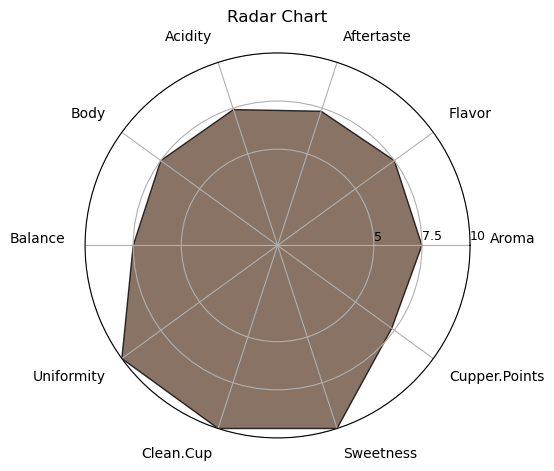

In [7]:
def make_radar_plot(df,k):
    # number of variable
    categories=list(df)[1:]
    N = len(categories)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values=df.loc[k].drop('country').values.flatten().tolist()
    values += values[:1]
    values

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    f = plt.figure(figsize=(5,5))
    ax = plt.subplot(111, polar=True)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], [x for x in categories], color='k', size=10)
    for label,i in zip(ax.get_xticklabels(),range(0,len(angles))):# adjust label position
        angle_rad=angles[i]
        
        if angle_rad <= np.pi/2:
            ha= 'left'
            va= "bottom"

        elif np.pi/2 < angle_rad <= np.pi:
            ha= 'right'
            va= "bottom"

        elif np.pi < angle_rad <= (3*np.pi/2):
            ha= 'right'
            va= "top"  

        else:
            ha= 'left'
            va= "top"

        label.set_verticalalignment(va)
        label.set_horizontalalignment(ha)
    
    #ax.tick_params(axis='x', pad=10)
    # Draw ylabels
    ax.set_rlabel_position(1)
    plt.yticks([5,7.5,10], ["5", "7.5", "10"], color="k", size=9)
    plt.ylim(0,10)
    
    # Fill area
    plt.fill(angles, values,facecolor='#6C503D', edgecolor='black',alpha=0.8)
    plt.title("Radar Chart", fontsize=12)
    plt.show();
    
make_radar_plot(df_profiles, 4)

In [8]:
import plotly.io as pio

In [9]:
def make_radar_plot_plotly(df, k):
    categories = list(df)[1:]
    N = len(categories)

    values = df.loc[k].drop('country').values.flatten().tolist()
    values += values[:1]

    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]

    fig = go.Figure()

    fig.add_trace(go.Scatterpolar(
        r=values,
        theta=[x * 180 / np.pi for x in angles[:-1]],
        fill='toself',
        line=dict(color='black'),
        marker=dict(color='#6C503D'),
        name=df.loc[k, 'country']
    ))

    fig.update_layout(
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, 10],
                showticklabels=True,
                tickvals=[5, 7.5, 10],
                ticktext=["5", "7.5", "10"],
                tickfont=dict(size=9),
            ),
            angularaxis=dict(
                visible=True,
                tickfont=dict(size=10),
                showline=False,
                showticklabels=True,
                tickvals=[x * 180 / np.pi for x in angles[:-1]],
                ticktext=categories,
            ),
        ),
        showlegend=False,
        title="Radar Chart",
    )

    fig.show()
    
    pio.write_html(fig, file='plotly_plot.html', auto_open=False)


In [10]:
make_radar_plot_plotly(df_profiles, 4)

In [11]:
import plotly.express as px
import pandas as pd
import numpy as np

# Create a sample DataFrame with random data
data = {
    'id': range(1, 21),
    'total.cup.points': np.random.randint(60, 100, size=20),
    'x': np.random.rand(20),
    'y': np.random.rand(20)
}

df = pd.DataFrame(data)

# Create a bubble chart using Plotly Express
fig = px.scatter(df,
                 x='x',
                 y='y',
                 size='total.cup.points',
                 hover_name='id',
                 size_max=60,
                 title='Bubble Chart with Total Cup Points',
                 width=800,
                 height=600)

# Update the axis properties to hide x and y axis
fig.update_xaxes(visible=False, showticklabels=False)
fig.update_yaxes(visible=False, showticklabels=False)

# Show the plot
fig.show()
